In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

#Teste

In [32]:
def sigmoide(z):
  return 1/(1 + np.exp(-z))

In [33]:
X = np.array([[1,1,1,1,1,1],[-4,-3,-2,2,3,4]]).T
y = np.array([0,0,0,1,1,1]).reshape(-1,1)

In [34]:
X.shape

(6, 2)

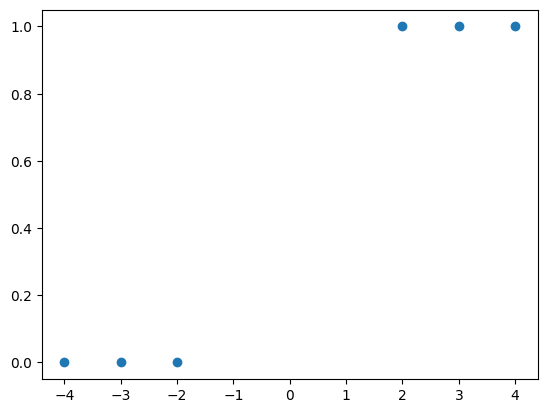

In [35]:
plt.scatter(X[:,1],y)
plt.show()

In [36]:
thetha = np.random.rand(X.shape[1],1)
thetha.shape

(2, 1)

In [37]:
n = 0.01
max_interactions = 100

for i in range(max_interactions):
  grad = (X.T @ (sigmoide(X@thetha) - y))/len(X)
  thetha = thetha - n*grad

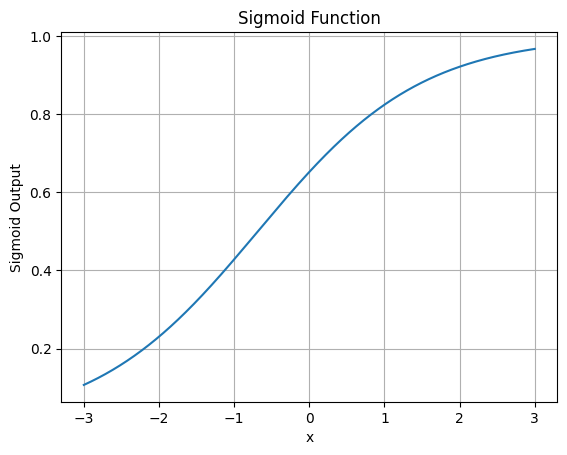

In [38]:
x = np.linspace(-3, 3, 1000).reshape(-1, 1)

# Create the design matrix for new input x
# Assuming x is the first feature and we are using a constant feature (bias term)
X_new = np.hstack((np.ones((x.shape[0], 1)), x))  # Add a column of ones for the intercept

# Compute the predictions using the sigmoid function
y_pred = sigmoide(X_new @ thetha)

# Plotting
plt.plot(x, y_pred)
plt.xlabel('x')
plt.ylabel('Sigmoid Output')
plt.title('Sigmoid Function')
plt.grid()
plt.show()

#Regressão Logistica ao dados de emprestimo bancarios

In [39]:
df = pd.read_csv("drive/MyDrive/Algoritmos-AM-e-RN/MachineLearning/Projeto02- Linkedin- Regressão Logistica/LoanPredict/Dados/dados_ajustado.csv")
df.iloc[:,5:9]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,4583,1508.0,128.0,360.0
1,3000,0.0,66.0,360.0
2,2583,2358.0,120.0,360.0
3,6000,0.0,141.0,360.0
4,5417,4196.0,267.0,360.0
...,...,...,...,...
475,2900,0.0,71.0,360.0
476,4106,0.0,40.0,180.0
477,8072,240.0,253.0,360.0
478,7583,0.0,187.0,360.0


In [40]:
df_tst = pd.DataFrame(columns=df.columns)
cont_1 = 0
cont_0 = 0
linhas = []
for i in range(len(df)):
  if df.iloc[i]['Loan_Status'] == 1 and cont_1 <=130:
    df_tst.loc[len(df_tst)] = df.iloc[i,:]
    cont_1 +=1
    linhas.append(i)

  elif df.iloc[i]['Loan_Status'] == 0 and cont_0 <=130:
    df_tst.loc[len(df_tst)] = df.iloc[i,:]
    cont_0 +=1
    linhas.append(i)

  #if cont_1 == 75 and cont_0 == 75:
    #break

In [41]:
df_tst.shape

(262, 14)

In [13]:
df_validacao = pd.DataFrame(columns=df.columns)
zero_to_480 = set(np.arange(0,480))
linhas = set(linhas)
linhas_validacao = sorted(list(zero_to_480 - linhas))
for linha in linhas_validacao:
  df_validacao.loc[len(df_validacao)] = df.iloc[linha,:]



In [14]:
df_validacao.shape

(218, 14)

In [15]:
df_tst.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
0,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,1.0,0.0,0.0,1.0
2,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,1.0,0.0,0.0,1.0
4,1.0,1.0,2.0,0.0,1.0,5417.0,4196.0,267.0,360.0,1.0,1.0,0.0,0.0,1.0


In [16]:
df_copy = df_tst.copy()

scaler = StandardScaler()
df_scaler = scaler.fit_transform(df_copy.iloc[:,5:9])
df_copy.iloc[:,5:9] = df_scaler


y = df_tst.iloc[:,10]
df_copy.drop(columns=['Loan_Status'],axis=1,inplace=True)
X = df_copy
X.insert(0,"Bias",np.ones((len(X),)))

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
thetha = np.random.rand(X.shape[1],1)
thetha.shape

(14, 1)

In [19]:
df_copy.head()

,Bias,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
0,1.0,1.0,1.0,1.0,0.0,0.0,-0.141373,-0.031601,-0.197168,0.277556,1.0,1.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,1.0,-0.379241,-0.692976,-0.944785,0.277556,1.0,0.0,0.0,1.0
2,1.0,1.0,1.0,0.0,1.0,0.0,-0.441901,0.341190,-0.293634,0.277556,1.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.071551,-0.692976,-0.040409,0.277556,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,2.0,0.0,1.0,-0.016053,1.147295,1.478942,0.277556,1.0,0.0,0.0,1.0


In [20]:
n = 0.1
max_interactions = 1000

for i in range(max_interactions):
  grad = (X_train.T @ (sigmoide(X_train@thetha) - y_train.to_numpy().reshape(-1,1)))/len(X_train)
  thetha = thetha - n*grad

In [21]:
p = sigmoide(X_test@thetha)

In [22]:
p.shape

(53, 1)

In [23]:
p.to_numpy()
predicao = np.where( p >=0.5, 1,0)

Matriz de Confusão:


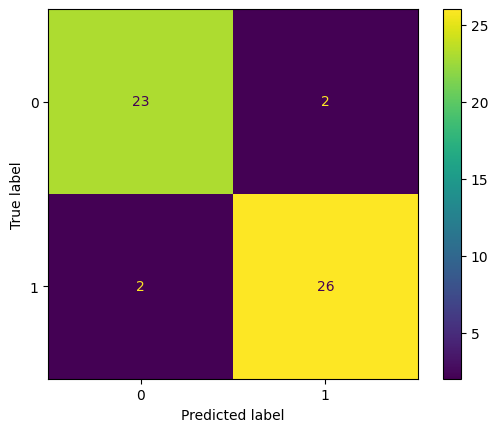

Acurácia:  0.9245283018867925


In [24]:
cfM = confusion_matrix(y_test,predicao)

display = ConfusionMatrixDisplay(confusion_matrix=cfM)

print("Matriz de Confusão:")
display.plot()
plt.show()


print("Acurácia: ",end=" ")
print(accuracy_score(predicao,y_test))

#Colocando os Dados que sobraram do DataFrame

In [25]:
df_validacao.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
0,1.0,1.0,0.0,0.0,0.0,1809.0,1868.0,90.0,360.0,1.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,1.0,2583.0,2167.0,104.0,360.0,1.0,1.0,1.0,0.0,0.0
2,1.0,1.0,1.0,1.0,0.0,2661.0,7101.0,279.0,180.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.0,3.0,0.0,0.0,3083.0,0.0,255.0,360.0,1.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,2060.0,2209.0,134.0,360.0,1.0,1.0,0.0,1.0,0.0


In [26]:
df_copy2 = df_validacao
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df_copy2.iloc[:,5:9])
df_copy2.iloc[:,5:9] = df_scaler


y_validacao = df_validacao.iloc[:,10]
df_copy2.drop(columns=['Loan_Status'],axis=1,inplace=True)
X_validacao = df_copy2
X_validacao.insert(0,"Bias",np.ones((len(X_validacao),)))

In [27]:
X_validacao

,Bias,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
0,1.0,1.0,1.0,0.0,0.0,0.0,-0.808630,0.096251,-0.714041,0.274256,1.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,1.0,1.0,-0.622545,0.196997,-0.532934,0.274256,1.0,1.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,0.0,-0.603793,1.859487,1.730895,-2.705205,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,3.0,0.0,0.0,-0.502336,-0.533164,1.420427,0.274256,1.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,-0.748285,0.211149,-0.144849,0.274256,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,1.0,0.0,0.0,0.0,0.0,0.0,-0.546333,-0.533164,-0.959828,0.274256,1.0,1.0,0.0,0.0
214,1.0,1.0,1.0,3.0,0.0,0.0,-0.256387,-0.533164,-1.360849,-2.705205,1.0,1.0,0.0,0.0
215,1.0,1.0,1.0,1.0,0.0,0.0,0.697115,-0.452297,1.394554,0.274256,1.0,0.0,0.0,1.0
216,1.0,1.0,1.0,2.0,0.0,0.0,0.579550,-0.533164,0.540767,0.274256,1.0,0.0,0.0,1.0


In [28]:
p = sigmoide(X_validacao@thetha)

In [29]:
p.to_numpy()
validacao = np.where( p >=0.5, 1,0)

Matriz de Confusão:


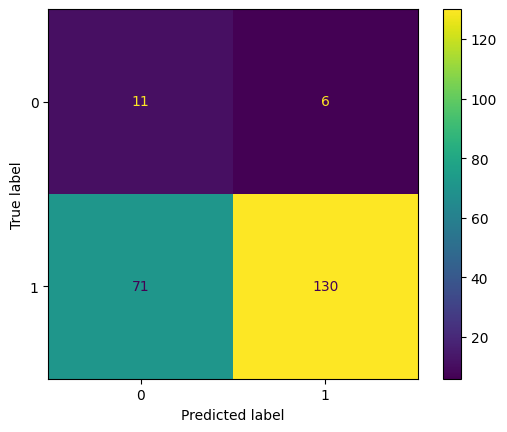

Acurácia:  0.6467889908256881


In [30]:
cfM = confusion_matrix(y_validacao,validacao)

display = ConfusionMatrixDisplay(confusion_matrix=cfM)

print("Matriz de Confusão:")
display.plot()
plt.show()


print("Acurácia: ",end=" ")
print(accuracy_score(validacao,y_validacao))

In [42]:
class RegressionLog():

  #X e y devem ser um matriz 2d
  def __init__(self,X,y) -> None:
      self.__thetha = np.random.rand(X.shape[1],1)
      self.__X = pd.DataFrame(X)
      self.__X.insert(0,"Bias",np.ones((len(X),)))
      self.__y = y.to_numpy().reshape(-1,1)

  def fit(self,learning_reating,n_interations) -> None:
      for i in range(max_interactions):
        grad = (X.T @ (sigmoide(X@thetha) - y.to_numpy().reshape(-1,1)))/len(X)
        thetha = thetha - n*grad


  def predict(self,data) -> np.float32:
      data.insert(0,"Bias",np.ones((len(data),)))
      predict = sigmoide(data@self.__theta)
      return predict

  def getTheta(self) -> np.array:
      return self.__theta

